In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nmf_son.base import nmf_son
from sklearn.decomposition import NMF

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def gauss(x, sigma=1, mean=0, scale=1):
    return scale * np.exp(-np.square(x - mean) / (2 * sigma ** 2))

In [3]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

In [4]:
m = 30
n = 10
r_true = 3

x = np.linspace(0, 1, m)

W_true = np.zeros((m, r_true))
mdiv = m // 3
W_true[0: mdiv, 0] = 1
W_true[mdiv: 2 * mdiv, 1] = 1
W_true[2 * mdiv: , 2] = 1

W_true = np.zeros((m, r_true))
W_true[:, 0] = gauss(x, sigma=0.1, mean=0, scale=1)
W_true[:, 1] = gauss(x, sigma=0.1, mean=0.5, scale=1)
W_true[:, 2] = gauss(x, sigma=0.1, mean=1, scale=1)

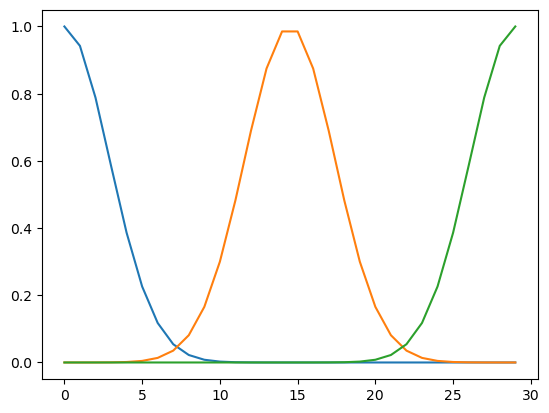

In [5]:
plt.plot(W_true)

In [6]:
H_true = np.random.rand(r_true, n)
H_true /= H_true.sum(axis=0, keepdims=True)

M = W_true @ H_true

In [7]:
rank = 5
W_ini = np.random.rand(m, rank)
H_ini = np.random.rand(rank, n)

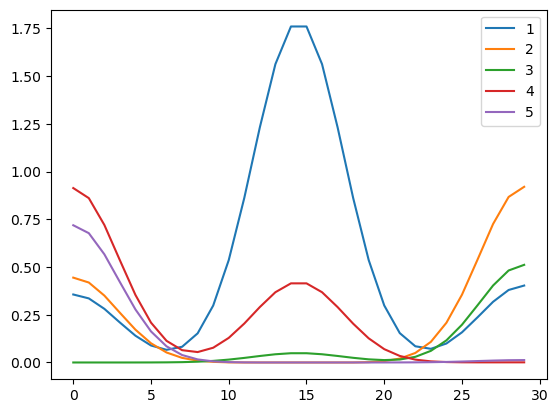

In [8]:
model = NMF(n_components=rank, init='random', random_state=42)
vanillaW = model.fit_transform(M)
vanillaH = model.components_

plt.plot(vanillaW)
plt.legend(range(1, 6))

In [ ]:
itermax = 1000
Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(M, W_ini.copy(), H_ini.copy(), _lambda=0.5, itermax=itermax, verbose=True)

Iteration: 1, f=3.842318587937583, g=0.9358821970329749,  total=4.239594201319157
Iteration: 2, f=2.0266091114921765, g=1.516345657999787,  total=5.139331591918708
Iteration: 3, f=1.994850787045767, g=0.6213989457052109,  total=2.4101033248144312
Iteration: 4, f=1.9400239566693533, g=0.8165138927018711,  total=3.2506339864639946
Iteration: 5, f=1.8183266551113266, g=0.5280894306545071,  total=2.4456926778396717
Iteration: 6, f=1.8437998428692886, g=1.2108094662066444,  total=3.9283398836877215
Iteration: 7, f=1.8700579184527186, g=0.7032113725460949,  total=2.405477013856084
Iteration: 8, f=1.8317986571936486, g=0.5370980271202715,  total=2.5459540717775893
Iteration: 9, f=1.7064902225585739, g=1.3192453505598885,  total=3.956165086029469
Iteration: 10, f=1.598997378649819, g=1.188157569026252,  total=2.3674591638445737
Iteration: 11, f=1.3954980562088368, g=1.199499195617563,  total=2.2026284063765056
Iteration: 12, f=1.2981154480253032, g=1.0997629259292097,  total=1.9378478592815713

In [32]:
W_ins = Wl
(W_ins >= 0).all()

True

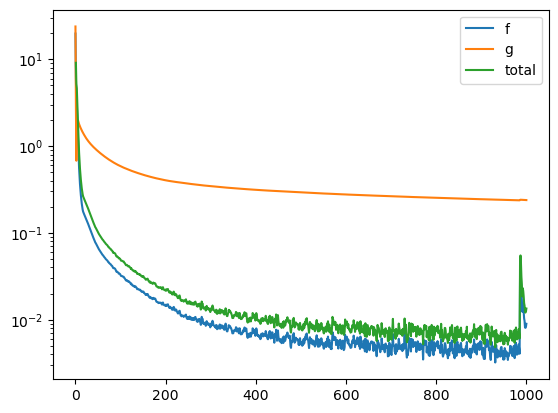

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + lambda_vals * gscores)
ax.legend(['f', 'g', 'total'])

In [34]:
normalized_similarity(W_ins)

array([[0.   , 0.27 , 0.305, 0.212, 0.213],
       [0.303, 0.   , 0.298, 0.203, 0.195],
       [0.289, 0.251, 0.   , 0.227, 0.233],
       [0.315, 0.269, 0.356, 0.   , 0.06 ],
       [0.317, 0.258, 0.366, 0.06 , 0.   ]])

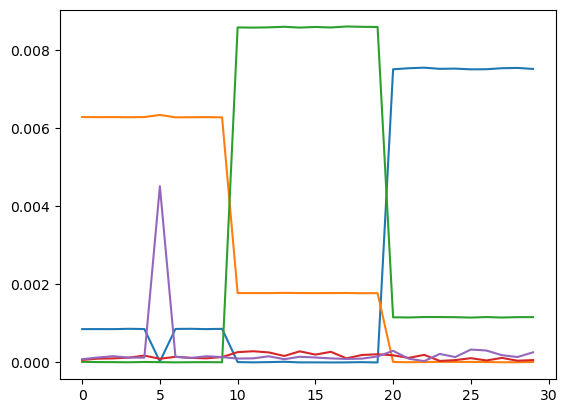

In [35]:
plt.plot(W_ins)

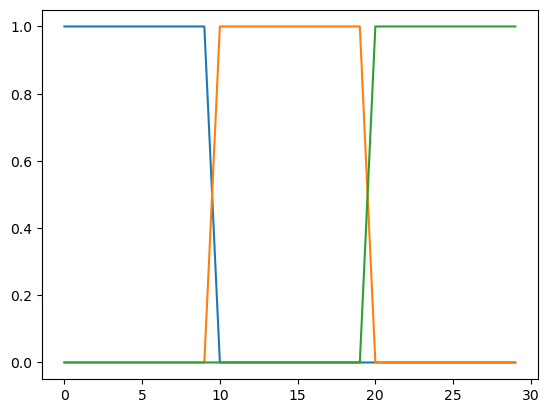

In [36]:
plt.plot(W_true)